<a href="https://colab.research.google.com/github/Sri-muppa/IVA-assignment-83/blob/main/IVA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample project for Color detection

Image: blue.webp - Detected Color: Rich Electric Blue (R=2, G=138, B=228)


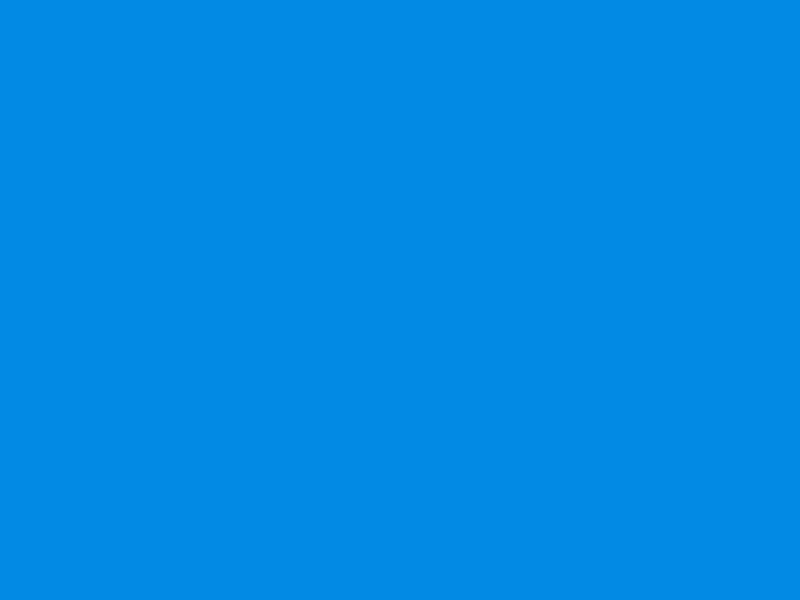

In [ ]:
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

# Load the dataset
color_data = pd.read_csv("/content/colors.csv")

# Strip spaces from column names
color_data.columns = color_data.columns.str.strip()

# Define columns for RGB values and color names
red_col, green_col, blue_col, color_name_col = color_data.columns[3], color_data.columns[4], color_data.columns[5], color_data.columns[1]

# Path for the image to be processed
image_file = "/content/blue.webp"  # Change this to your image path

# Function to compute the Euclidean distance between RGB values
def calculate_color_distance(R, G, B):
    min_distance = float("inf")
    detected_color = ""

    for _, row in color_data.iterrows():
        distance = np.sqrt((R - row[red_col])**2 + (G - row[green_col])**2 + (B - row[blue_col])**2)
        if distance < min_distance:
            min_distance = distance
            detected_color = row[color_name_col]

    return detected_color

# Function to process the image and detect the color at a specific pixel
def identify_color_from_image(image_path, center_x, center_y):
    image = cv2.imread(image_path)  # Read the image
    image_resized = cv2.resize(image, (800, 600))  # Resize the image for consistency
    blue, green, red = image_resized[center_y, center_x]  # Extract the BGR values from the center pixel

    # Get the closest color from the dataset
    color = calculate_color_distance(red, green, blue)

    print(f"Image: {image_path.split('/')[-1]} - Detected Color: {color} (R={red}, G={green}, B={blue})")

    # Show the image
    cv2_imshow(image_resized)

# Set coordinates to check the color (center of the image)
center_x, center_y = 400, 300  # Adjust this for a different point in the image

# Process the single image
identify_color_from_image(image_file, center_x, center_y)


Data structures for Image Analysis -Write a program that
computes the T-pyramid of an image

Saving tiger.jpg to tiger (1).jpg


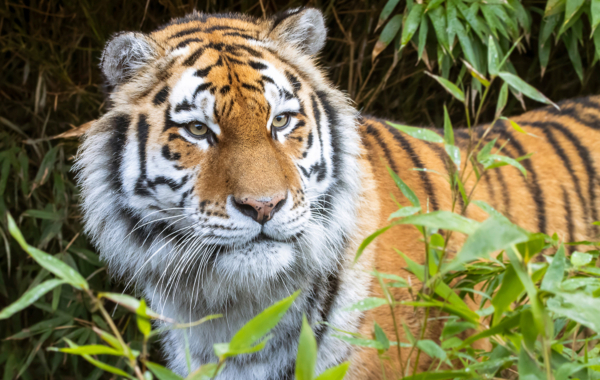

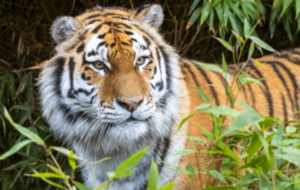

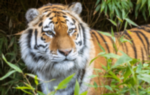

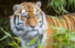

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow  # ✅ Correct function name

def build_t_pyramid(image, levels):
    """
    Constructs the T-Pyramid of an image.
    :param image: Input image
    :param levels: Number of levels in the pyramid
    :return: List containing different levels of the T-pyramid
    """

    if image is None:
        print("Error: Could not load image.")
        return []

    pyramid = [image]  # First level is the original image

    for _ in range(1, levels):
        image = cv2.pyrDown(image)  # Reduce size
        pyramid.append(image)  # Store resized image

    return pyramid

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Define the number of pyramid levels
num_levels = 5

# Build the T-Pyramid
t_pyramid = build_t_pyramid(image, num_levels)

# Display each level of the pyramid
for i, img in enumerate(t_pyramid):
    cv2_imshow(img)  # ✅ Corrected function name


Sample project for Image Smoothing

Please upload an image file.


Saving spotify.png to spotify.png
Original Image


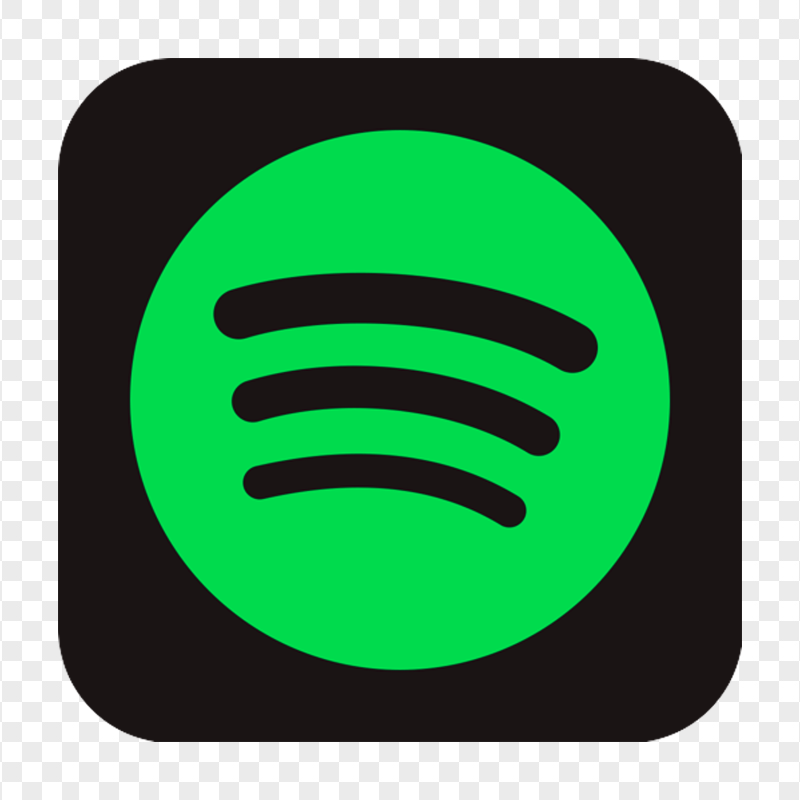

Averaging Blur


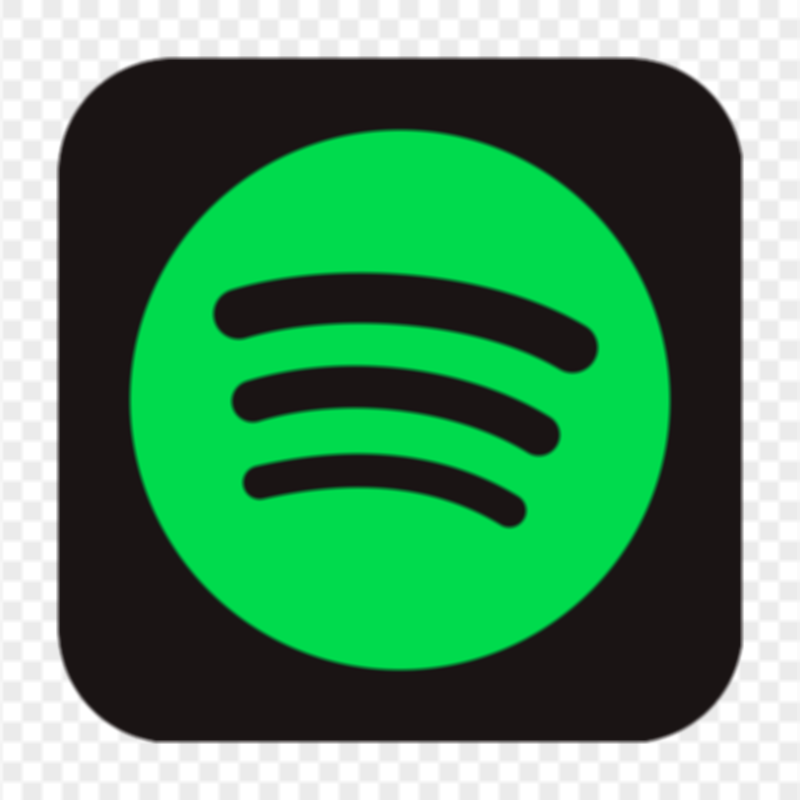

Gaussian Blur


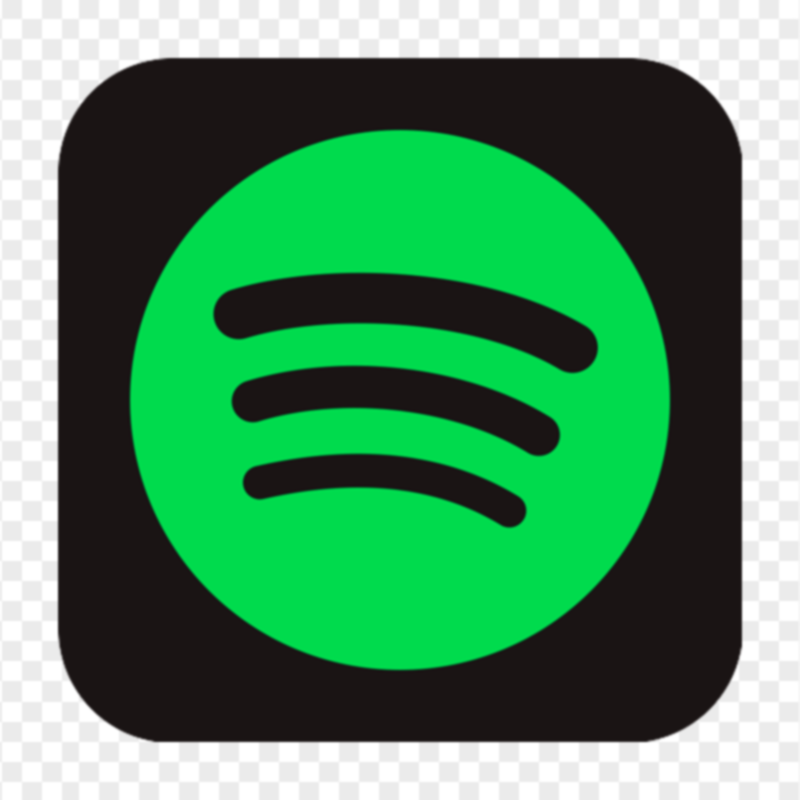

Median Blur


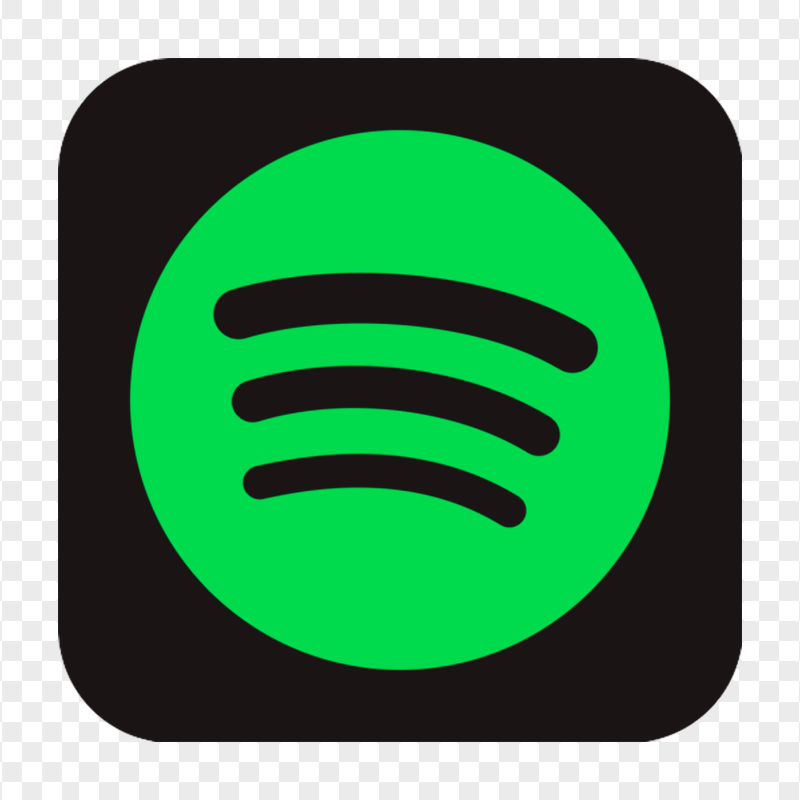

Bilateral Filter


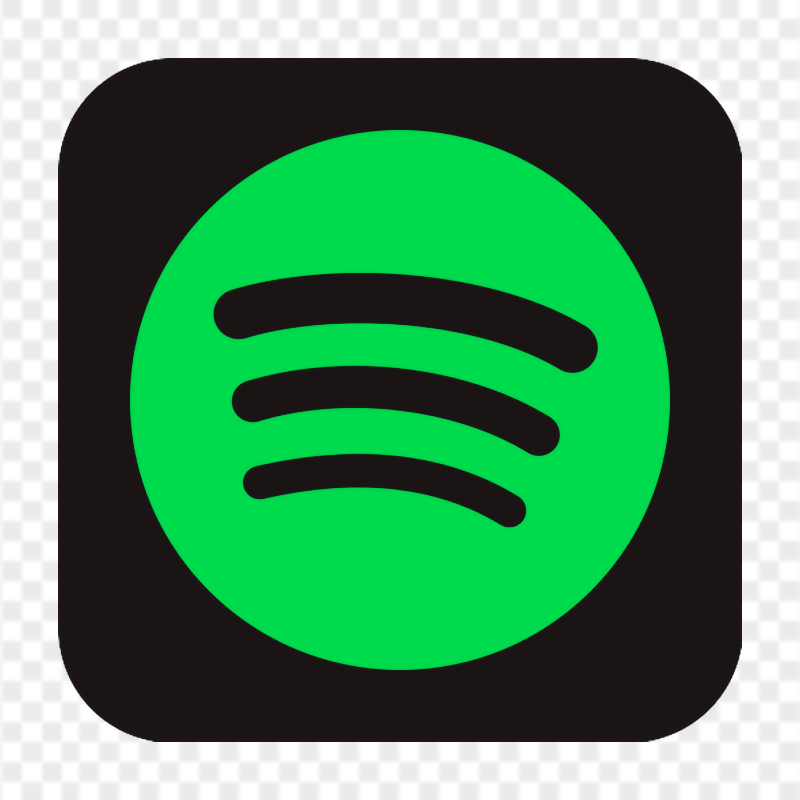

In [ ]:
import cv2
import numpy as np

# Try to import Colab-specific modules
try:
    from google.colab import files
    from google.colab.patches import cv2_imshow
    COLAB_MODE = True
except ImportError:
    COLAB_MODE = False

# **Step 1: Load Image**
if COLAB_MODE:
    print("Please upload an image file.")
    uploaded = files.upload()  # Upload an image in Colab
    image_path = list(uploaded.keys())[0]  # Get uploaded file name
else:
    image_path = "image.jpg"  # Change this to your image path

# Read the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from '{image_path}'")
    exit()

# **Step 2: Apply Different Smoothing Techniques**
average_blur = cv2.blur(image, (5, 5))  # Averaging Filter
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian Blur
median_blur = cv2.medianBlur(image, 5)  # Median Filter
bilateral_blur = cv2.bilateralFilter(image, 9, 75, 75)  # Bilateral Filter

# **Step 3: Display Images**
if COLAB_MODE:
    print("Original Image")
    cv2_imshow(image)

    print("Averaging Blur")
    cv2_imshow(average_blur)

    print("Gaussian Blur")
    cv2_imshow(gaussian_blur)

    print("Median Blur")
    cv2_imshow(median_blur)

    print("Bilateral Filter")
    cv2_imshow(bilateral_blur)
else:
    cv2.imshow("Original Image", image)
    cv2.imshow("Averaging Blur", average_blur)
    cv2.imshow("Gaussian Blur", gaussian_blur)
    cv2.imshow("Median Blur", median_blur)
    cv2.imshow("Bilateral Filter", bilateral_blur)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


Sample project for Edge detection using Sobel ,Canny edge

Please upload an image file.


Saving tiger.jpg to tiger.jpg
Original Image


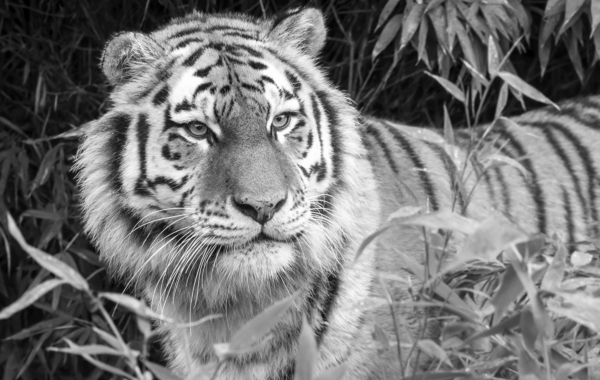

Sobel X Edge Detection


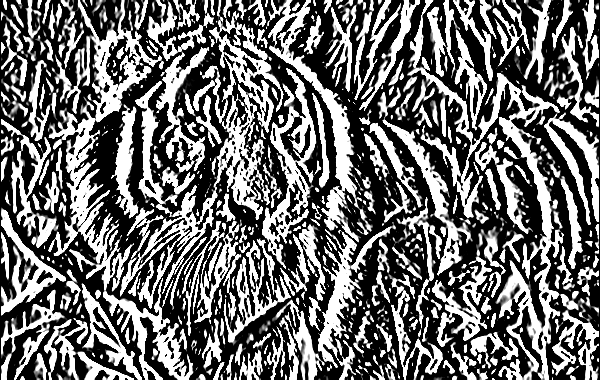

Sobel Y Edge Detection


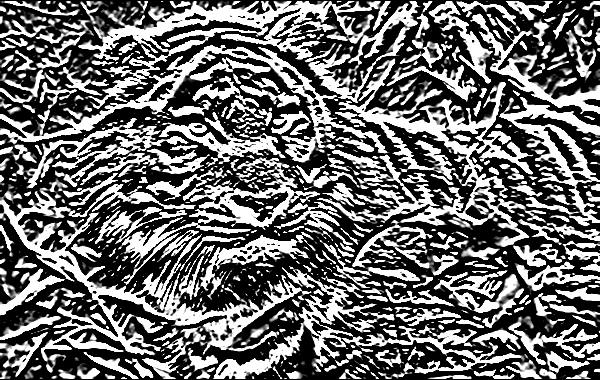

Combined Sobel Edge Detection


/usr/local/lib/python3.11/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


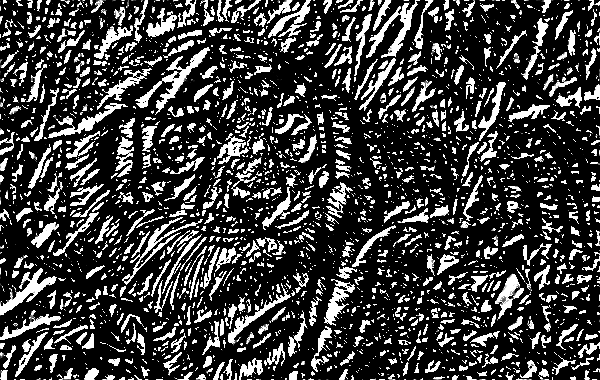

Canny Edge Detection


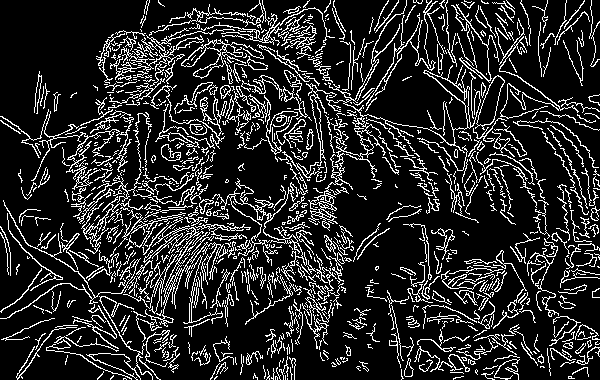

In [ ]:
import cv2
import numpy as np

# Try to import Colab-specific modules
try:
    from google.colab import files
    from google.colab.patches import cv2_imshow
    COLAB_MODE = True
except ImportError:
    COLAB_MODE = False

# **Step 1: Load Image**
if COLAB_MODE:
    print("Please upload an image file.")
    uploaded = files.upload()  # Upload an image in Colab
    image_path = list(uploaded.keys())[0]  # Get uploaded file name
else:
    image_path = "image.jpg"  # Change this to your image path

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from '{image_path}'")
    exit()

# **Step 2: Apply Sobel Edge Detection**
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Y
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)  # Combine X and Y gradients

# **Step 3: Apply Canny Edge Detection**
canny_edges = cv2.Canny(image, 100, 200)  # Canny with thresholds (100, 200)

# **Step 4: Display Results**
if COLAB_MODE:
    print("Original Image")
    cv2_imshow(image)

    print("Sobel X Edge Detection")
    cv2_imshow(sobel_x)

    print("Sobel Y Edge Detection")
    cv2_imshow(sobel_y)

    print("Combined Sobel Edge Detection")
    cv2_imshow(sobel_combined)

    print("Canny Edge Detection")
    cv2_imshow(canny_edges)
else:
    cv2.imshow("Original Image", image)
    cv2.imshow("Sobel X Edge Detection", sobel_x)
    cv2.imshow("Sobel Y Edge Detection", sobel_y)
    cv2.imshow("Combined Sobel Edge Detection", sobel_combined)
    cv2.imshow("Canny Edge Detection", canny_edges)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


Object Detection with OpenCV
● Detect simple objects like faces, eyes, or hands using
OpenCV and Haar cascades.
● Libraries: OpenCV, NumPy

Saving images1.jpg to images1 (2).jpg


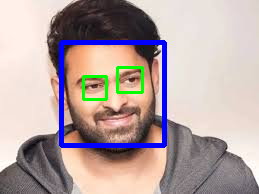

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow  # Use this in Colab

# Upload an image
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Load Haar Cascade Classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# NOTE: OpenCV does not have a built-in Haar cascade for hands.
# If you have a trained hand cascade XML file, provide the correct path.
hand_cascade_path = "/path/to/haarcascade_hand.xml"  # Replace with actual path

# Check if the hand cascade file exists
try:
    hand_cascade = cv2.CascadeClassifier(hand_cascade_path)
    hand_cascade_loaded = not hand_cascade.empty()
except:
    hand_cascade_loaded = False

# Read the image
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# **Face Detection**
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Blue rectangle for face

    # **Eye Detection within the detected face region**
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # Green rectangle for eyes

# **Hand Detection (if Haar cascade is available)**
if hand_cascade_loaded:
    hands = hand_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3)
    for (hx, hy, hw, hh) in hands:
        cv2.rectangle(image, (hx, hy), (hx + hw, hy + hh), (0, 0, 255), 2)  # Red rectangle for hands

# Display the processed image with detected faces, eyes, and hands
cv2_imshow(image)
